### Gradient Descent

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Dataset

In [5]:
sns.set_style('darkgrid')
np.random.seed(seed=1)

x = np.random.uniform(0, 1, 12)

def f(x):
    return 2*x + 0

noise = 0.15
noise = np.random.randn(x.shape[0]) * noise

y = f(x) + noise


In [6]:
x.shape, y.shape

((12,), (12,))

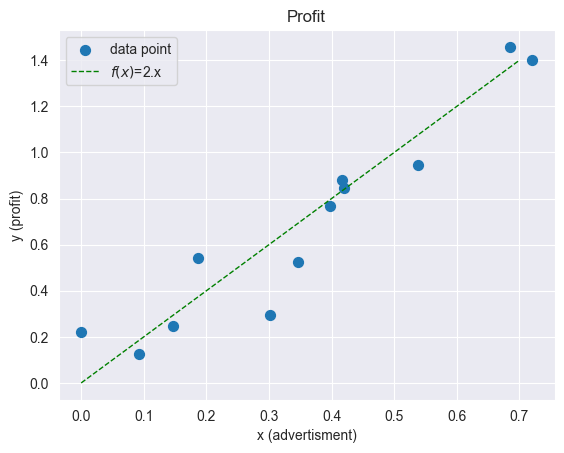

In [7]:
plt.scatter(x, y, marker='o', s=50, label='data point')

plt.plot([0, 0.7], [f(0), 1.4], 'g--', lw=1, label='$f(x)$=2.x')
plt.xlabel('x (advertisment)')
plt.ylabel('y (profit)')

plt.title('Profit')
plt.legend(loc=2)
plt.show()

### Neuron and Cost function (MSE)

In [8]:
# 1 Neuron
def neuron(x, w):
    return w*x + 0

In [9]:
def loss_mse(y_pred, y_true):
    return np.mean((y_true - y_pred)**2)

[0.         0.08163265 0.16326531 0.24489796 0.32653061 0.40816327
 0.48979592 0.57142857 0.65306122 0.73469388 0.81632653 0.89795918
 0.97959184 1.06122449 1.14285714 1.2244898  1.30612245 1.3877551
 1.46938776 1.55102041 1.63265306 1.71428571 1.79591837 1.87755102
 1.95918367 2.04081633 2.12244898 2.20408163 2.28571429 2.36734694
 2.44897959 2.53061224 2.6122449  2.69387755 2.7755102  2.85714286
 2.93877551 3.02040816 3.10204082 3.18367347 3.26530612 3.34693878
 3.42857143 3.51020408 3.59183673 3.67346939 3.75510204 3.83673469
 3.91836735 4.        ]


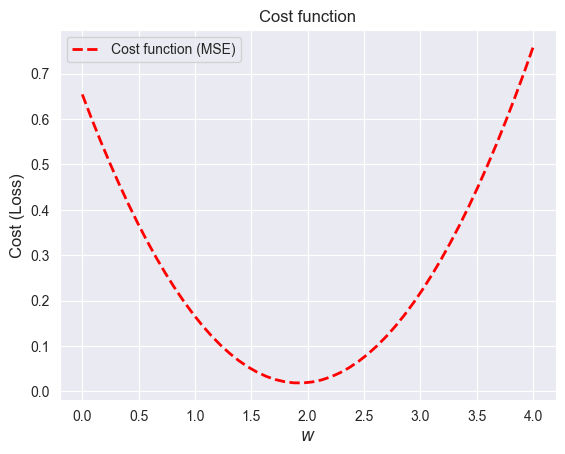

In [10]:
ws = np.linspace(0, 4, num=50)
print(ws)

loss_ws = [loss_mse(neuron(x,w), y) for w in ws]

plt.plot(ws, loss_ws, 'r--', lw=2, label='Cost function (MSE)')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Cost function')
plt.legend()
plt.show()

### Gradient and Train

In [11]:
np.random.rand() * 4

2.7675084558018934

In [15]:
def gradient(w, x, y_true):
    y_pred = neuron(x, w)
    return 2 * x * (y_pred - y_true)

def delta_w(w_k, x, y, learning_rate):
    """Update function delta w"""
    return learning_rate * np.mean(gradient(w_k, x, y))

w = 0.08
learning_rate = 0.9

no_of_iterations = 3

history_loss = [(w, loss_mse(neuron(x, w), y))]
for i in range(no_of_iterations):
    dw = delta_w(w, x, y, learning_rate)
    w = w - dw
    history_loss.append((w, loss_mse(neuron(x, w), y)))
    
for i in range(0, len(history_loss)):
    print('{} -> w: {:.2f} \t loss: {}'.format(i, history_loss[i][0], history_loss[i][1]))

0 -> w: 0.08 	 loss: 0.6026350889130302
1 -> w: 0.65 	 loss: 0.2972873040173511
2 -> w: 1.04 	 loss: 0.15157473984131506
3 -> w: 1.32 	 loss: 0.08204041731132092


### Plot steps

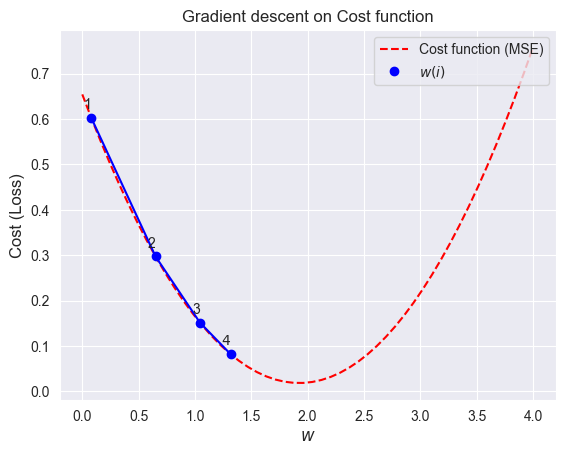

In [16]:
plt.plot(ws, loss_ws, 'r--', label='Cost function (MSE)')

for i in range(0, len(history_loss)-1):
    w1, c1 = history_loss[i]
    w2, c2 = history_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.02, f'{i+1}', ha='right')
    
plt.plot(w2, c2, 'bo', label='$w(i)$')
plt.text(w2, c2+0.02, f'${i+2}$', ha='right')

plt.xlabel('$w$', fontsize=12)
plt.ylabel('Cost (Loss)', fontsize=12)
plt.title('Gradient descent on Cost function')

plt.legend(loc=1)
plt.show()

### Loss Curve

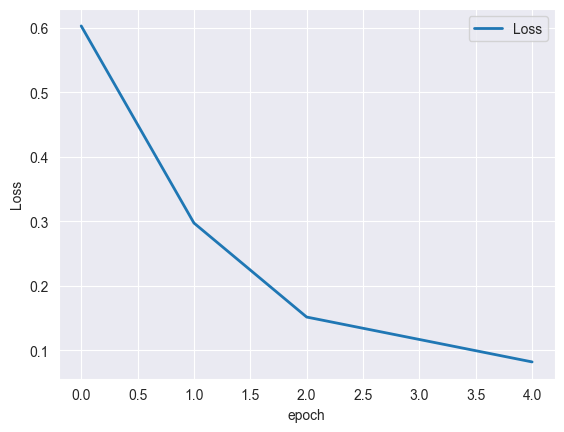

In [17]:
epoch = np.linspace(0, len(history_loss), num=len(history_loss)).astype('int')
step_loss = [ls[1] for ls in history_loss]

plt.plot(epoch, step_loss, lw=2, label='Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

### sklearn